In [19]:
# Start writing code here...
import pandas as pd
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [20]:
header = list(pd.read_csv('TripBulkReportTripsHeaders.csv',keep_default_na=True))
df_1 = pd.read_csv('./Full Data1/trips.csv', keep_default_na=True, names=header, index_col=False)
df_2 = pd.read_csv('./Full Data1/trips1.csv', keep_default_na=True, names=header, index_col=False)

In [21]:
trips_df = pd.concat([df_1, df_2], ignore_index=True, axis=0)
trips_df = df_1
trips_df.head()
# trips_df.shape

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,TripMaxSpeedKph,TripDistanceMeters,MovementType,OriginCbg,DestCbg,StartTimezone,EndTimezone,WaypointFreqSec,StartQk,EndQk
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,66.209191,10334.148764,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113121202,23101211002301332
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,88.591427,7008.578087,1,NaN,NaN,America/Denver,America/Denver,NaN,23101211002022010,23101210111330030
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,121.215525,48426.026903,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112222,23101033200023313
3,e0f43e41709cbadf8822c72c1974e5e0,066bf8928ed16a20c8aa38236830943f,42998cf32d552343bc8e460416382dca,1,2021-04-06T12:02:42.000Z,2,2021-04-06T12:23:35.000Z,2,38.73962,-104.78553,...,55.700365,9290.569312,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112203,23101210111323212
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,90.225440,9798.029628,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210111323333,23101211000003302


In [22]:
trips_df.columns

Index(['TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate', 'StartWDay',
       'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon', 'EndLocLat',
       'EndLocLon', 'GeospatialType', 'ProviderType', 'ProviderDrivingProfile',
       'VehicleWeightClass', 'ProbeSourceType', 'OriginZoneName',
       'DestinationZoneName', 'EndpointType', 'TripMeanSpeedKph',
       'TripMaxSpeedKph', 'TripDistanceMeters', 'MovementType', 'OriginCbg',
       'DestCbg', 'StartTimezone', 'EndTimezone', 'WaypointFreqSec', 'StartQk',
       'EndQk'],
      dtype='object')

In [23]:
number_of_dup = len(trips_df[trips_df.duplicated(subset=list(trips_df.columns).remove('TripId')) == True])
number_of_fort = len(trips_df[(trips_df['OriginZoneName']!='Buc-ee\'s Giddings TX')& (trips_df['DestinationZoneName']!='Buc-ee\'s Giddings TX')])

print('Number of rows in original data:', len(trips_df))
print('Number of data in Fort Carson : ',number_of_fort)
print('Number of duplicated rows : ',number_of_dup)

Number of rows in original data: 2316049
Number of data in Fort Carson :  2316049
Number of duplicated rows :  0


# Create geometry column

In [24]:
trips_df = trips_df[(trips_df['OriginZoneName']!='Buc-ee\'s Giddings TX')& (trips_df['DestinationZoneName']!='Buc-ee\'s Giddings TX')]

In [25]:
gdf=trips_df
gdf

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,TripMaxSpeedKph,TripDistanceMeters,MovementType,OriginCbg,DestCbg,StartTimezone,EndTimezone,WaypointFreqSec,StartQk,EndQk
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,66.209191,10334.148764,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113121202,23101211002301332
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,88.591427,7008.578087,1,NaN,NaN,America/Denver,America/Denver,NaN,23101211002022010,23101210111330030
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,121.215525,48426.026903,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112222,23101033200023313
3,e0f43e41709cbadf8822c72c1974e5e0,066bf8928ed16a20c8aa38236830943f,42998cf32d552343bc8e460416382dca,1,2021-04-06T12:02:42.000Z,2,2021-04-06T12:23:35.000Z,2,38.73962,-104.78553,...,55.700365,9290.569312,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112203,23101210111323212
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,90.225440,9798.029628,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210111323333,23101211000003302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316044,fe2ea6074f3836461db2be5c1a9cb75a,fd180d7afc72f698069f4fdf67e499a3,d07e70efcfab08731a97e7b91be644de,1,2021-09-10T13:26:59.000Z,5,2021-09-10T13:38:19.000Z,5,38.72248,-104.77867,...,65.900911,1735.759307,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113132312,23101210113131323
2316045,9960104b3542ae500da7ba60835718f6,fddbc516daccb14bb3e9984fb06ee0ce,42998cf32d552343bc8e460416382dca,1,2021-09-10T13:03:58.000Z,5,2021-09-10T13:28:39.000Z,5,38.68175,-104.78691,...,111.115038,21527.887460,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210131110022,23101210111130002
2316046,5c7a01ad811e76d7c756a087432ce19e,fde4aba038ce6f658fbff0ceb34958f1,42998cf32d552343bc8e460416382dca,1,2021-09-15T17:21:33.000Z,3,2021-09-15T17:23:54.000Z,3,38.74926,-104.78828,...,58.031525,515.991884,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113101311,23101210113101111
2316047,57b161f1160af74e84916b8c661504ef,fed8a653833ff8cda747926f50c86c73,42998cf32d552343bc8e460416382dca,1,2021-09-09T17:39:49.000Z,4,2021-09-09T19:44:23.000Z,4,38.74819,-104.79515,...,60.714750,27059.985819,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113101212,23101211002023000


# DateTime Preprocess

In [26]:
gdf['MST_start_datetime'] = pd.to_datetime(gdf['StartDate']).apply(lambda x:x.astimezone('MST'))
gdf['MST_end_datetime'] = pd.to_datetime(gdf['EndDate']).apply(lambda x:x.astimezone('MST'))

gdf['MST_start_date'] = gdf['MST_start_datetime'].apply(lambda x:x.date())
gdf['MST_start_time'] = gdf['MST_start_datetime'].apply(lambda x:x.time())

gdf['MST_end_date'] = gdf['MST_end_datetime'].apply(lambda x:x.date())
gdf['MST_end_time'] = gdf['MST_end_datetime'].apply(lambda x:x.time())

# Exclude Vehicle Type "Fleet"

In [27]:
# exclude data whose ProviderType == Fleet
gdf = gdf[gdf['ProviderType']==1] 

In [28]:
gdf.shape

(2209203, 37)

In [23]:
gdf.to_csv("trips_after_cleaning.csv", index = False)

In [29]:
gdf.columns

Index(['TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate', 'StartWDay',
       'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon', 'EndLocLat',
       'EndLocLon', 'GeospatialType', 'ProviderType', 'ProviderDrivingProfile',
       'VehicleWeightClass', 'ProbeSourceType', 'OriginZoneName',
       'DestinationZoneName', 'EndpointType', 'TripMeanSpeedKph',
       'TripMaxSpeedKph', 'TripDistanceMeters', 'MovementType', 'OriginCbg',
       'DestCbg', 'StartTimezone', 'EndTimezone', 'WaypointFreqSec', 'StartQk',
       'EndQk', 'MST_start_datetime', 'MST_end_datetime', 'MST_start_date',
       'MST_start_time', 'MST_end_date', 'MST_end_time'],
      dtype='object')

In [30]:
print(gdf['MST_start_date'].min())
print(gdf['MST_start_date'].max())

print(gdf['MST_end_date'].min())
print(gdf['MST_end_date'].max())

2020-09-30
2021-09-30
2020-09-30
2021-09-30


# Create Separate Columns for Date &amp; Time

In [13]:
# create df of start day, month, year 
# startYear = list(pd.DatetimeIndex(gdf['MST_start_date']).year)
# startMonth = list(pd.DatetimeIndex(gdf['MST_start_date']).month)
# startDay = list(pd.DatetimeIndex(gdf['MST_start_date']).day)

# insert the start month, day, year column into the gdf
# gdf.insert(int(gdf.columns.get_indexer(['MST_start_date'])[0]+1), 'MST_start_month',startMonth)
# gdf.insert(int(gdf.columns.get_indexer(['MST_start_date'])[0]+2), 'MST_start_day',startDay)
# gdf.insert(int(gdf.columns.get_indexer(['MST_start_date'])[0]+3), 'MST_start_year',startYear)

# create df of start hour, minutes, and seconds
# startHour = list(pd.DatetimeIndex(gdf['MST_start_datetime']).hour)
# startMin = list(pd.DatetimeIndex(gdf['MST_start_datetime']).minute)
# startSec = list(pd.DatetimeIndex(gdf['MST_start_datetime']).second)

# insert the start hour, minutes, seconds column into the gdf
# gdf.insert(int(gdf.columns.get_indexer(['MST_start_time'])[0]+1), 'MST_start_hour',startHour)
# gdf.insert(int(gdf.columns.get_indexer(['MST_start_time'])[0]+2), 'MST_start_minute',startMin)
# gdf.insert(int(gdf.columns.get_indexer(['MST_start_time'])[0]+3), 'MST_start_second',startSec)

# create df of end day, month, year 
# endYear = list(pd.DatetimeIndex(gdf['MST_end_date']).year)
# endMonth = list(pd.DatetimeIndex(gdf['MST_end_date']).month)
# endDay = list(pd.DatetimeIndex(gdf['MST_end_date']).day)

# insert the start month, day, year column into the gdf
# gdf.insert(int(gdf.columns.get_indexer(['MST_end_date'])[0]+1), 'MST_end_month',endMonth)
# gdf.insert(int(gdf.columns.get_indexer(['MST_end_date'])[0]+2), 'MST_end_day',endDay)
# gdf.insert(int(gdf.columns.get_indexer(['MST_end_date'])[0]+3), 'MST_end_year',endYear)

# create df of end hour, minutes, and seconds
# endHour = list(pd.DatetimeIndex(gdf['MST_end_datetime']).hour)
# endMin = list(pd.DatetimeIndex(gdf['MST_end_datetime']).minute)
# endSec = list(pd.DatetimeIndex(gdf['MST_end_datetime']).second)

# insert the start hour, minutes, seconds column into the gdf
# gdf.insert(int(gdf.columns.get_indexer(['MST_end_time'])[0]+1), 'MST_end_hour',endHour)
# gdf.insert(int(gdf.columns.get_indexer(['MST_end_time'])[0]+2), 'MST_end_minute',endMin)
# gdf.insert(int(gdf.columns.get_indexer(['MST_end_time'])[0]+3), 'MST_end_second',endSec)

# gdf

In [ ]:
# gdf.to_csv("new_updated_trip_datetime.csv", index = False)

# II: Separate data with only "II" type

In [31]:
gdf_ii = gdf.loc[gdf['GeospatialType'] == 'II']

# Clustering on "II" Type Data

## Starting Point Clustering

In [32]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=28,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = gdf_ii[['StartLocLat', 'StartLocLon']]
end_features = gdf_ii[['EndLocLat', 'EndLocLon']]

In [33]:
# do clustering
kmeans.fit(features)
# save results
labels = kmeans.labels_

In [34]:
# send back into dataframe and display it
gdf_ii['cluster'] = labels

In [35]:
gdf_ii

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,cluster
3,e0f43e41709cbadf8822c72c1974e5e0,066bf8928ed16a20c8aa38236830943f,42998cf32d552343bc8e460416382dca,1,2021-04-06T12:02:42.000Z,2,2021-04-06T12:23:35.000Z,2,38.73962,-104.78553,...,NaN,23101210113112203,23101210111323212,2021-04-06 05:02:42-07:00,2021-04-06 05:23:35-07:00,2021-04-06,05:02:42,2021-04-06,05:23:35,21
5,00d24e39220be69831d8894e254d7194,06a4af08e5b62c87f3c881ab6aa28681,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T17:20:20.000Z,5,2021-04-02T17:29:52.000Z,5,38.73748,-104.78691,...,NaN,23101210113112222,23101210113103232,2021-04-02 10:20:20-07:00,2021-04-02 10:29:52-07:00,2021-04-02,10:20:20,2021-04-02,10:29:52,21
6,914b6769a626b25226395502ef48fd40,0716f93ec5aa2e0ee6b1ebe04cf36c3a,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:50:16.000Z,2,2021-04-06T18:54:35.000Z,2,38.74605,-104.79927,...,NaN,23101210113100333,23101210113110012,2021-04-06 11:50:16-07:00,2021-04-06 11:54:35-07:00,2021-04-06,11:50:16,2021-04-06,11:54:35,23
7,0f1da24ffba6f8619778c02370215fd3,0780dfc81f2279035d68becd8e3c73c8,42998cf32d552343bc8e460416382dca,1,2021-04-06T17:01:00.000Z,2,2021-04-06T17:06:32.000Z,2,38.72784,-104.77455,...,NaN,23101210113133001,23101210113332312,2021-04-06 10:01:00-07:00,2021-04-06 10:06:32-07:00,2021-04-06,10:01:00,2021-04-06,10:06:32,18
8,0e8479c5edfb1e8c590c84d1fff8cf60,095b6ec9bf79a36c48dd1251261e304a,42998cf32d552343bc8e460416382dca,1,2021-04-06T14:13:10.000Z,2,2021-04-06T15:21:18.000Z,2,38.72998,-104.76081,...,NaN,23101211002020231,23101211002020322,2021-04-06 07:13:10-07:00,2021-04-06 08:21:18-07:00,2021-04-06,07:13:10,2021-04-06,08:21:18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316039,4c37b52656e72ca0ddfe85854243e096,fa922361500e1c04fd14806fd38f02b3,42998cf32d552343bc8e460416382dca,1,2021-09-12T17:13:48.000Z,7,2021-09-12T17:29:15.000Z,7,38.75247,-104.80476,...,NaN,23101210113100013,23101210113100011,2021-09-12 10:13:48-07:00,2021-09-12 10:29:15-07:00,2021-09-12,10:13:48,2021-09-12,10:29:15,1
2316040,47a96f4a90425e65d6fefad4e2407499,fac1e116ac9818e60a0277a8c77e7ad3,42998cf32d552343bc8e460416382dca,1,2021-09-09T17:29:26.000Z,4,2021-09-09T17:34:35.000Z,4,38.76104,-104.79927,...,NaN,23101210111322113,23101210113103230,2021-09-09 10:29:26-07:00,2021-09-09 10:34:35-07:00,2021-09-09,10:29:26,2021-09-09,10:34:35,26
2316044,fe2ea6074f3836461db2be5c1a9cb75a,fd180d7afc72f698069f4fdf67e499a3,d07e70efcfab08731a97e7b91be644de,1,2021-09-10T13:26:59.000Z,5,2021-09-10T13:38:19.000Z,5,38.72248,-104.77867,...,NaN,23101210113132312,23101210113131323,2021-09-10 06:26:59-07:00,2021-09-10 06:38:19-07:00,2021-09-10,06:26:59,2021-09-10,06:38:19,4
2316046,5c7a01ad811e76d7c756a087432ce19e,fde4aba038ce6f658fbff0ceb34958f1,42998cf32d552343bc8e460416382dca,1,2021-09-15T17:21:33.000Z,3,2021-09-15T17:23:54.000Z,3,38.74926,-104.78828,...,NaN,23101210113101311,23101210113101111,2021-09-15 10:21:33-07:00,2021-09-15 10:23:54-07:00,2021-09-15,10:21:33,2021-09-15,10:23:54,16


In [30]:
gdf_ii.to_csv("./Full Data1/ii_start.csv")

# II: Show Number of Trips By Cluster

In [36]:
gdf_ii_start =  pd.read_csv('./Full Data1/ii_start.csv', index_col = 0)

In [37]:
# display the number of mamber each clustering
_clusters = gdf_ii_start.groupby('cluster',as_index=False).agg(tripcount = ('TripId','count'))
ii_start_sorted_clusters = _clusters.sort_values(by ='tripcount')

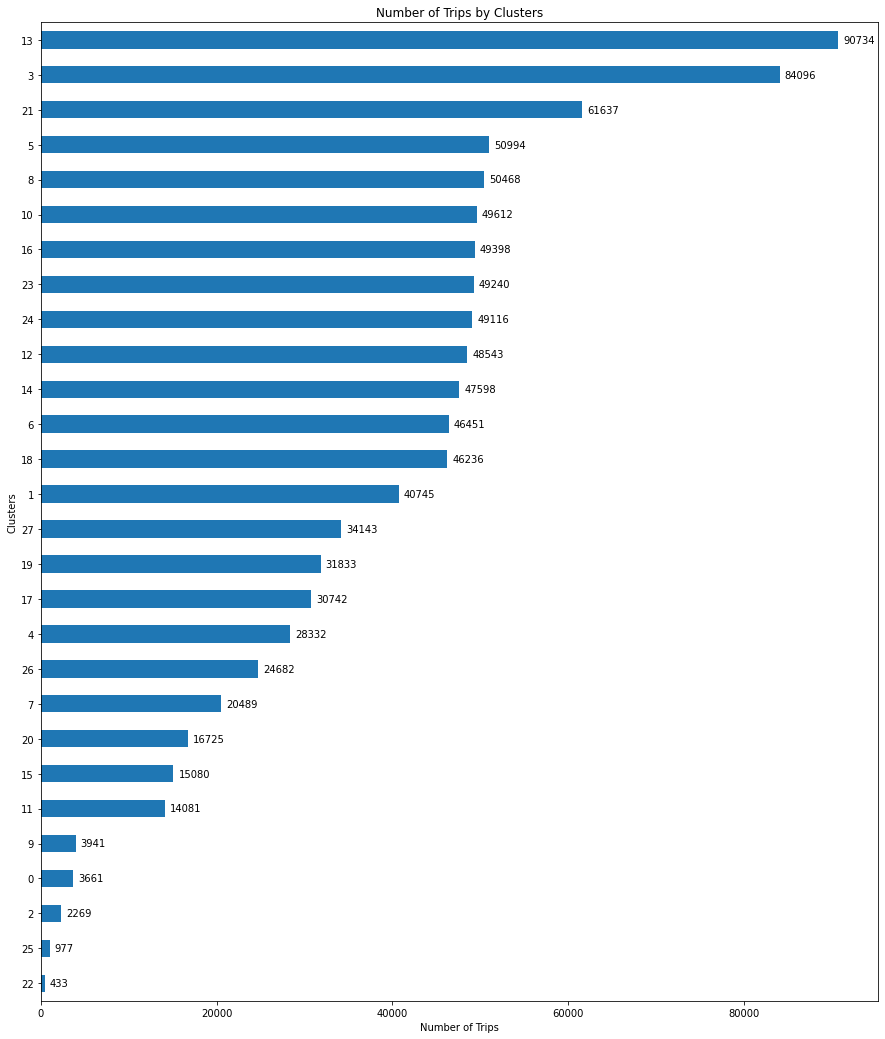

In [92]:
#plt.rcParams['figure.figsize'] = [12, 15]
plt.figure(figsize=(15,18))
# Plot the figure.
cluster = list(ii_start_sorted_clusters.index)
tripcount = ii_start_sorted_clusters['tripcount']
# Plot the figure.
ax = tripcount.plot(kind='barh')
ax.set_title('Number of Trips by Clusters')
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Clusters')
ax.set_yticklabels(cluster)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:d}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")

## End Point Clustering

In [43]:
gdf_ii = gdf.loc[gdf['GeospatialType'] == 'II']

In [44]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=28,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = gdf_ii[['StartLocLat', 'StartLocLon']]
end_features = gdf_ii[['EndLocLat', 'EndLocLon']]

In [45]:
# do clustering
kmeans.fit(end_features)
# save results
labels = kmeans.labels_

In [46]:
# send back into dataframe and display it
gdf_ii['end_cluster'] = labels

In [47]:
gdf_ii

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,end_cluster
3,e0f43e41709cbadf8822c72c1974e5e0,066bf8928ed16a20c8aa38236830943f,42998cf32d552343bc8e460416382dca,1,2021-04-06T12:02:42.000Z,2,2021-04-06T12:23:35.000Z,2,38.73962,-104.78553,...,NaN,23101210113112203,23101210111323212,2021-04-06 05:02:42-07:00,2021-04-06 05:23:35-07:00,2021-04-06,05:02:42,2021-04-06,05:23:35,17
5,00d24e39220be69831d8894e254d7194,06a4af08e5b62c87f3c881ab6aa28681,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T17:20:20.000Z,5,2021-04-02T17:29:52.000Z,5,38.73748,-104.78691,...,NaN,23101210113112222,23101210113103232,2021-04-02 10:20:20-07:00,2021-04-02 10:29:52-07:00,2021-04-02,10:20:20,2021-04-02,10:29:52,5
6,914b6769a626b25226395502ef48fd40,0716f93ec5aa2e0ee6b1ebe04cf36c3a,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:50:16.000Z,2,2021-04-06T18:54:35.000Z,2,38.74605,-104.79927,...,NaN,23101210113100333,23101210113110012,2021-04-06 11:50:16-07:00,2021-04-06 11:54:35-07:00,2021-04-06,11:50:16,2021-04-06,11:54:35,11
7,0f1da24ffba6f8619778c02370215fd3,0780dfc81f2279035d68becd8e3c73c8,42998cf32d552343bc8e460416382dca,1,2021-04-06T17:01:00.000Z,2,2021-04-06T17:06:32.000Z,2,38.72784,-104.77455,...,NaN,23101210113133001,23101210113332312,2021-04-06 10:01:00-07:00,2021-04-06 10:06:32-07:00,2021-04-06,10:01:00,2021-04-06,10:06:32,7
8,0e8479c5edfb1e8c590c84d1fff8cf60,095b6ec9bf79a36c48dd1251261e304a,42998cf32d552343bc8e460416382dca,1,2021-04-06T14:13:10.000Z,2,2021-04-06T15:21:18.000Z,2,38.72998,-104.76081,...,NaN,23101211002020231,23101211002020322,2021-04-06 07:13:10-07:00,2021-04-06 08:21:18-07:00,2021-04-06,07:13:10,2021-04-06,08:21:18,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316039,4c37b52656e72ca0ddfe85854243e096,fa922361500e1c04fd14806fd38f02b3,42998cf32d552343bc8e460416382dca,1,2021-09-12T17:13:48.000Z,7,2021-09-12T17:29:15.000Z,7,38.75247,-104.80476,...,NaN,23101210113100013,23101210113100011,2021-09-12 10:13:48-07:00,2021-09-12 10:29:15-07:00,2021-09-12,10:13:48,2021-09-12,10:29:15,16
2316040,47a96f4a90425e65d6fefad4e2407499,fac1e116ac9818e60a0277a8c77e7ad3,42998cf32d552343bc8e460416382dca,1,2021-09-09T17:29:26.000Z,4,2021-09-09T17:34:35.000Z,4,38.76104,-104.79927,...,NaN,23101210111322113,23101210113103230,2021-09-09 10:29:26-07:00,2021-09-09 10:34:35-07:00,2021-09-09,10:29:26,2021-09-09,10:34:35,5
2316044,fe2ea6074f3836461db2be5c1a9cb75a,fd180d7afc72f698069f4fdf67e499a3,d07e70efcfab08731a97e7b91be644de,1,2021-09-10T13:26:59.000Z,5,2021-09-10T13:38:19.000Z,5,38.72248,-104.77867,...,NaN,23101210113132312,23101210113131323,2021-09-10 06:26:59-07:00,2021-09-10 06:38:19-07:00,2021-09-10,06:26:59,2021-09-10,06:38:19,23
2316046,5c7a01ad811e76d7c756a087432ce19e,fde4aba038ce6f658fbff0ceb34958f1,42998cf32d552343bc8e460416382dca,1,2021-09-15T17:21:33.000Z,3,2021-09-15T17:23:54.000Z,3,38.74926,-104.78828,...,NaN,23101210113101311,23101210113101111,2021-09-15 10:21:33-07:00,2021-09-15 10:23:54-07:00,2021-09-15,10:21:33,2021-09-15,10:23:54,11


In [40]:
gdf_ii.to_csv("./Full Data1/ii_end.csv")

## II Endpoint: Show Number of Trips By Cluster

In [48]:
gdf_ii_end =  pd.read_csv('./Full Data1/ii_end.csv', index_col = 0)

In [49]:
# display the number of mamber each clustering
_clusters = gdf_ii_end.groupby('end_cluster',as_index=False).agg(tripcount = ('TripId','count'))
ii_end_sorted_clusters = _clusters.sort_values(by ='tripcount')

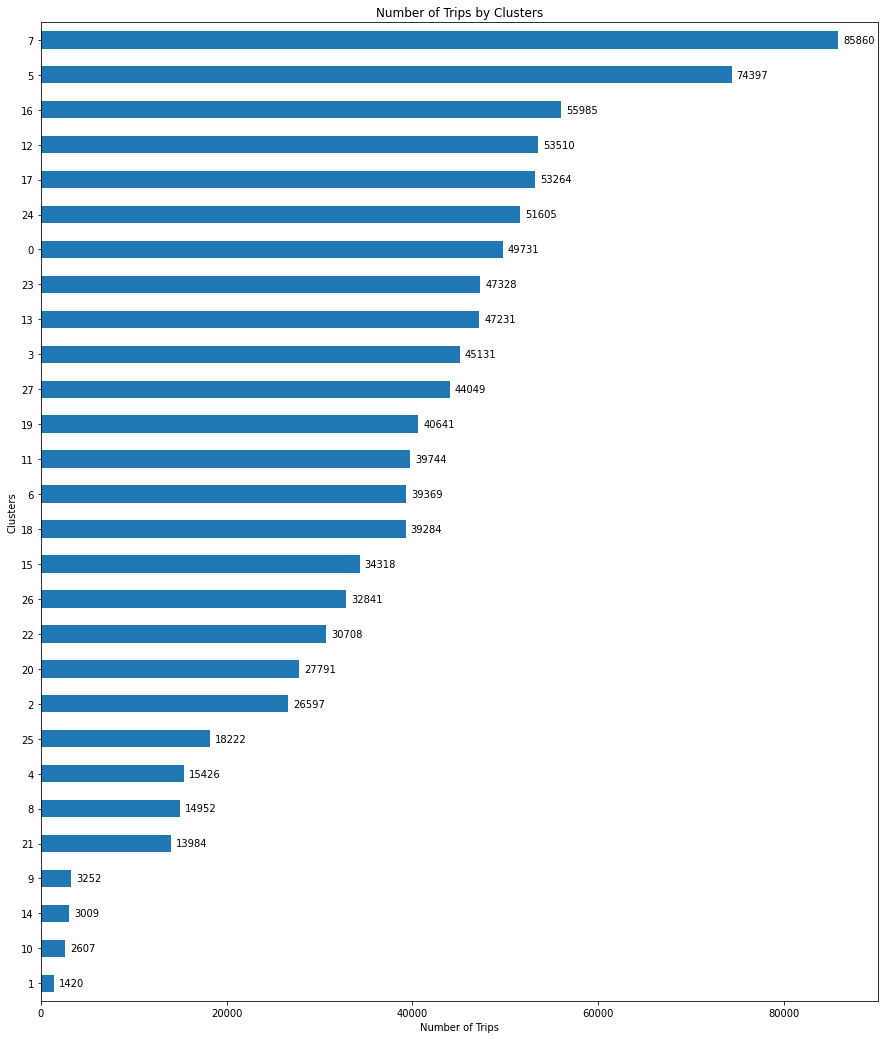

In [50]:
#plt.rcParams['figure.figsize'] = [12, 15]
plt.figure(figsize=(15,18))
# Plot the figure.
cluster = list(ii_end_sorted_clusters.index)
tripcount = ii_end_sorted_clusters['tripcount']
# Plot the figure.
ax = tripcount.plot(kind='barh')
ax.set_title('Number of Trips by Clusters')
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Clusters')
ax.set_yticklabels(cluster)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:d}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")

In [51]:
print(len(gdf_ii_start.index))
print(len(gdf_ii_end.index))

992256
992256


In [52]:
gdf_ii = gdf.loc[gdf['GeospatialType'] == 'II']

In [53]:
print(len(gdf_ii.index))

992256


In [47]:
gdf_ii['StartCluster'] = gdf_ii_start['cluster']
gdf_ii['EndCluster'] = gdf_ii_end['end_cluster']

In [48]:
gdf_ii.to_csv('./Full Data1/trips_ii.csv')

# IE: Separate data with only "IE" type

## Starting Point

In [95]:
gdf_ie = gdf.loc[gdf['GeospatialType'] == 'IE']

In [96]:
gdf_ie.head()

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,EndTimezone,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,America/Denver,NaN,23101210113121202,23101211002301332,2021-04-07 15:35:03-07:00,2021-04-07 15:50:41-07:00,2021-04-07,15:35:03,2021-04-07,15:50:41
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,America/Denver,NaN,23101211002022010,23101210111330030,2021-04-06 16:27:12-07:00,2021-04-06 16:39:07-07:00,2021-04-06,16:27:12,2021-04-06,16:39:07
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,America/Denver,NaN,23101210113112222,23101033200023313,2021-04-02 14:49:56-07:00,2021-04-02 15:48:51-07:00,2021-04-02,14:49:56,2021-04-02,15:48:51
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,America/Denver,NaN,23101210111323333,23101211000003302,2021-04-06 12:13:00-07:00,2021-04-06 12:26:20-07:00,2021-04-06,12:13:00,2021-04-06,12:26:20
9,146d9db26257f4fd9e78964f8b758171,0ad4188372ceb1718c3317660130aab7,c3e878e27f52e2a57ace4d9a76fd9acf,1,2021-04-01T22:28:29.272Z,4,2021-04-01T23:02:26.529Z,4,38.73962,-104.79240,...,America/Denver,NaN,23101210113103302,23101032333233022,2021-04-01 15:28:29.272000-07:00,2021-04-01 16:02:26.529000-07:00,2021-04-01,15:28:29.272000,2021-04-01,16:02:26.529000


In [97]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=28,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = gdf_ie[['StartLocLat', 'StartLocLon']]
end_features = gdf_ie[['EndLocLat', 'EndLocLon']]

In [98]:
# do clustering
kmeans.fit(features)
# save results
labels = kmeans.labels_

In [99]:
# send back into dataframe and display it
gdf_ie['start_cluster'] = labels

In [100]:
gdf_ie

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,start_cluster
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,NaN,23101210113121202,23101211002301332,2021-04-07 15:35:03-07:00,2021-04-07 15:50:41-07:00,2021-04-07,15:35:03,2021-04-07,15:50:41,3
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,NaN,23101211002022010,23101210111330030,2021-04-06 16:27:12-07:00,2021-04-06 16:39:07-07:00,2021-04-06,16:27:12,2021-04-06,16:39:07,17
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,NaN,23101210113112222,23101033200023313,2021-04-02 14:49:56-07:00,2021-04-02 15:48:51-07:00,2021-04-02,14:49:56,2021-04-02,15:48:51,11
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,NaN,23101210111323333,23101211000003302,2021-04-06 12:13:00-07:00,2021-04-06 12:26:20-07:00,2021-04-06,12:13:00,2021-04-06,12:26:20,13
9,146d9db26257f4fd9e78964f8b758171,0ad4188372ceb1718c3317660130aab7,c3e878e27f52e2a57ace4d9a76fd9acf,1,2021-04-01T22:28:29.272Z,4,2021-04-01T23:02:26.529Z,4,38.73962,-104.79240,...,NaN,23101210113103302,23101032333233022,2021-04-01 15:28:29.272000-07:00,2021-04-01 16:02:26.529000-07:00,2021-04-01,15:28:29.272000,2021-04-01,16:02:26.529000,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316031,2c29a59364d7b4a24aa5368de055e64e,f3f9fe57e00d5d76a4f257d4ddd1aa99,42998cf32d552343bc8e460416382dca,1,2021-09-15T22:27:06.000Z,3,2021-09-15T22:48:41.000Z,3,38.74283,-104.78416,...,NaN,23101210113112030,23101211000002300,2021-09-15 15:27:06-07:00,2021-09-15 15:48:41-07:00,2021-09-15,15:27:06,2021-09-15,15:48:41,0
2316036,844de5e49777689942a9e07e8a20369e,f88eb99a0ba22cc0cf668d8f89dd3e0e,42998cf32d552343bc8e460416382dca,1,2021-09-14T22:49:19.000Z,2,2021-09-14T23:13:50.000Z,2,38.71819,-104.79515,...,NaN,23101210113301012,23101032333320202,2021-09-14 15:49:19-07:00,2021-09-14 16:13:50-07:00,2021-09-14,15:49:19,2021-09-14,16:13:50,27
2316038,b242982f093d9e68fb8ac717bb5d4b5f,fa91bad191fe2179daaeb7b718c7dad8,42998cf32d552343bc8e460416382dca,1,2021-09-13T16:55:22.000Z,1,2021-09-13T17:26:39.000Z,1,38.71926,-104.79377,...,NaN,23101210113301011,23101033220330120,2021-09-13 09:55:22-07:00,2021-09-13 10:26:39-07:00,2021-09-13,09:55:22,2021-09-13,10:26:39,27
2316045,9960104b3542ae500da7ba60835718f6,fddbc516daccb14bb3e9984fb06ee0ce,42998cf32d552343bc8e460416382dca,1,2021-09-10T13:03:58.000Z,5,2021-09-10T13:28:39.000Z,5,38.68175,-104.78691,...,NaN,23101210131110022,23101210111130002,2021-09-10 06:03:58-07:00,2021-09-10 06:28:39-07:00,2021-09-10,06:03:58,2021-09-10,06:28:39,20


In [101]:
print(gdf_ie.shape)

(607549, 38)


In [81]:
gdf_ie.to_csv("./Full Data1/ie_start.csv")

## IE: Show Number of Trips By Clusters

In [102]:
gdf_ie_start =  pd.read_csv('./Full Data1/ie_start.csv', index_col = 0)

In [104]:
# display the number of mamber each clustering
_clusters = gdf_ie_start.groupby('start_cluster',as_index=False).agg(tripcount = ('TripId','count'))
sorted_clusters = _clusters.sort_values(by ='tripcount')

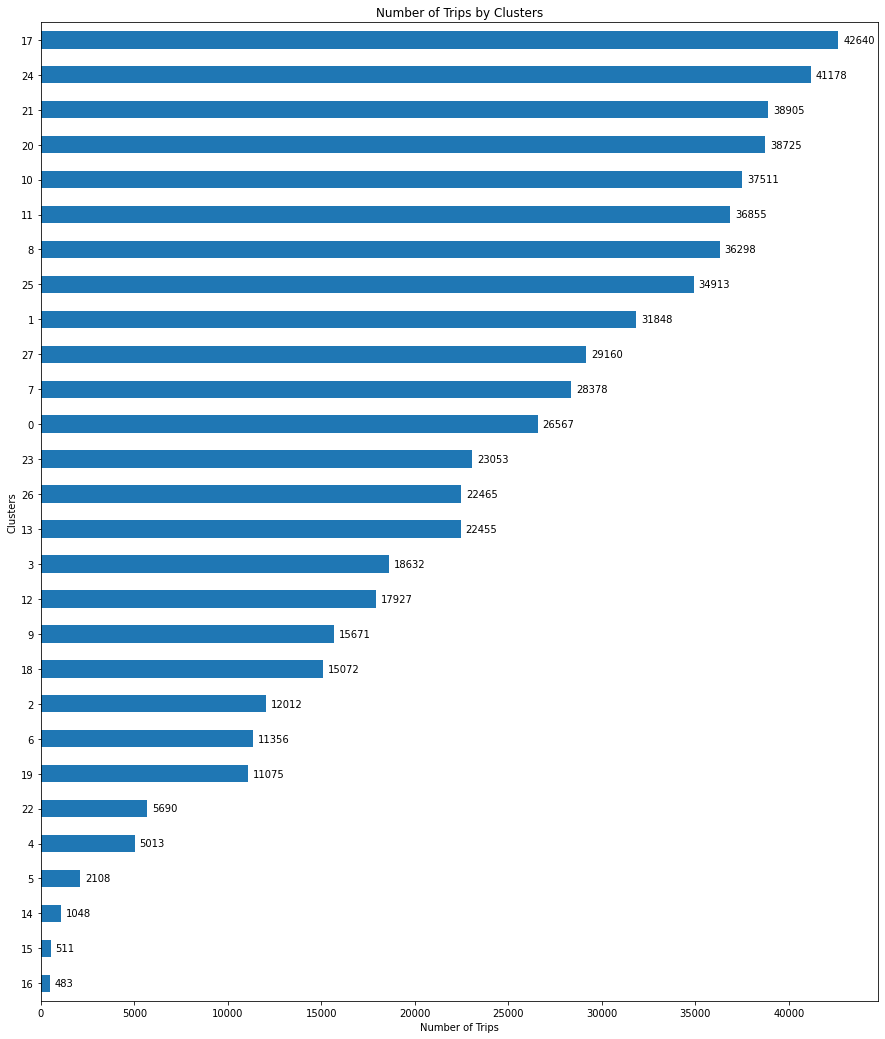

In [105]:
#plt.rcParams['figure.figsize'] = [12, 15]
plt.figure(figsize=(15,18))
# Plot the figure.
cluster = list(sorted_clusters.index)
tripcount = sorted_clusters['tripcount']
# Plot the figure.
ax = tripcount.plot(kind='barh')
ax.set_title('Number of Trips by Clusters')
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Clusters')
ax.set_yticklabels(cluster)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:d}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")

## IE: End Point

In [106]:
gdf_ie = gdf.loc[gdf['GeospatialType'] == 'IE']

In [107]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=28,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = gdf_ie[['StartLocLat', 'StartLocLon']]
end_features = gdf_ie[['EndLocLat', 'EndLocLon']]

In [108]:
# do clustering
kmeans.fit(end_features)
# save results
labels = kmeans.labels_

In [109]:
# send back into dataframe and display it
gdf_ie['end_cluster'] = labels

In [110]:
gdf_ie

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,end_cluster
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,NaN,23101210113121202,23101211002301332,2021-04-07 15:35:03-07:00,2021-04-07 15:50:41-07:00,2021-04-07,15:35:03,2021-04-07,15:50:41,0
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,NaN,23101211002022010,23101210111330030,2021-04-06 16:27:12-07:00,2021-04-06 16:39:07-07:00,2021-04-06,16:27:12,2021-04-06,16:39:07,7
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,NaN,23101210113112222,23101033200023313,2021-04-02 14:49:56-07:00,2021-04-02 15:48:51-07:00,2021-04-02,14:49:56,2021-04-02,15:48:51,21
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,NaN,23101210111323333,23101211000003302,2021-04-06 12:13:00-07:00,2021-04-06 12:26:20-07:00,2021-04-06,12:13:00,2021-04-06,12:26:20,16
9,146d9db26257f4fd9e78964f8b758171,0ad4188372ceb1718c3317660130aab7,c3e878e27f52e2a57ace4d9a76fd9acf,1,2021-04-01T22:28:29.272Z,4,2021-04-01T23:02:26.529Z,4,38.73962,-104.79240,...,NaN,23101210113103302,23101032333233022,2021-04-01 15:28:29.272000-07:00,2021-04-01 16:02:26.529000-07:00,2021-04-01,15:28:29.272000,2021-04-01,16:02:26.529000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316031,2c29a59364d7b4a24aa5368de055e64e,f3f9fe57e00d5d76a4f257d4ddd1aa99,42998cf32d552343bc8e460416382dca,1,2021-09-15T22:27:06.000Z,3,2021-09-15T22:48:41.000Z,3,38.74283,-104.78416,...,NaN,23101210113112030,23101211000002300,2021-09-15 15:27:06-07:00,2021-09-15 15:48:41-07:00,2021-09-15,15:27:06,2021-09-15,15:48:41,16
2316036,844de5e49777689942a9e07e8a20369e,f88eb99a0ba22cc0cf668d8f89dd3e0e,42998cf32d552343bc8e460416382dca,1,2021-09-14T22:49:19.000Z,2,2021-09-14T23:13:50.000Z,2,38.71819,-104.79515,...,NaN,23101210113301012,23101032333320202,2021-09-14 15:49:19-07:00,2021-09-14 16:13:50-07:00,2021-09-14,15:49:19,2021-09-14,16:13:50,22
2316038,b242982f093d9e68fb8ac717bb5d4b5f,fa91bad191fe2179daaeb7b718c7dad8,42998cf32d552343bc8e460416382dca,1,2021-09-13T16:55:22.000Z,1,2021-09-13T17:26:39.000Z,1,38.71926,-104.79377,...,NaN,23101210113301011,23101033220330120,2021-09-13 09:55:22-07:00,2021-09-13 10:26:39-07:00,2021-09-13,09:55:22,2021-09-13,10:26:39,4
2316045,9960104b3542ae500da7ba60835718f6,fddbc516daccb14bb3e9984fb06ee0ce,42998cf32d552343bc8e460416382dca,1,2021-09-10T13:03:58.000Z,5,2021-09-10T13:28:39.000Z,5,38.68175,-104.78691,...,NaN,23101210131110022,23101210111130002,2021-09-10 06:03:58-07:00,2021-09-10 06:28:39-07:00,2021-09-10,06:03:58,2021-09-10,06:28:39,24


In [80]:
gdf_ie.to_csv("./Full Data1/ie_end.csv")

## IE: Endpoints: Show the Number of Trips by Cluster

In [111]:
gdf_ie_end = pd.read_csv("./Full Data1/ie_end.csv",index_col=0)

In [112]:
gdf_ie_end

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,end_cluster
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,NaN,23101210113121202,23101211002301332,2021-04-07 15:35:03-07:00,2021-04-07 15:50:41-07:00,2021-04-07,15:35:03,2021-04-07,15:50:41,0
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,NaN,23101211002022010,23101210111330030,2021-04-06 16:27:12-07:00,2021-04-06 16:39:07-07:00,2021-04-06,16:27:12,2021-04-06,16:39:07,7
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,NaN,23101210113112222,23101033200023313,2021-04-02 14:49:56-07:00,2021-04-02 15:48:51-07:00,2021-04-02,14:49:56,2021-04-02,15:48:51,21
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,NaN,23101210111323333,23101211000003302,2021-04-06 12:13:00-07:00,2021-04-06 12:26:20-07:00,2021-04-06,12:13:00,2021-04-06,12:26:20,16
9,146d9db26257f4fd9e78964f8b758171,0ad4188372ceb1718c3317660130aab7,c3e878e27f52e2a57ace4d9a76fd9acf,1,2021-04-01T22:28:29.272Z,4,2021-04-01T23:02:26.529Z,4,38.73962,-104.79240,...,NaN,23101210113103302,23101032333233022,2021-04-01 15:28:29.272000-07:00,2021-04-01 16:02:26.529000-07:00,2021-04-01,15:28:29.272000,2021-04-01,16:02:26.529000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316031,2c29a59364d7b4a24aa5368de055e64e,f3f9fe57e00d5d76a4f257d4ddd1aa99,42998cf32d552343bc8e460416382dca,1,2021-09-15T22:27:06.000Z,3,2021-09-15T22:48:41.000Z,3,38.74283,-104.78416,...,NaN,23101210113112030,23101211000002300,2021-09-15 15:27:06-07:00,2021-09-15 15:48:41-07:00,2021-09-15,15:27:06,2021-09-15,15:48:41,16
2316036,844de5e49777689942a9e07e8a20369e,f88eb99a0ba22cc0cf668d8f89dd3e0e,42998cf32d552343bc8e460416382dca,1,2021-09-14T22:49:19.000Z,2,2021-09-14T23:13:50.000Z,2,38.71819,-104.79515,...,NaN,23101210113301012,23101032333320202,2021-09-14 15:49:19-07:00,2021-09-14 16:13:50-07:00,2021-09-14,15:49:19,2021-09-14,16:13:50,22
2316038,b242982f093d9e68fb8ac717bb5d4b5f,fa91bad191fe2179daaeb7b718c7dad8,42998cf32d552343bc8e460416382dca,1,2021-09-13T16:55:22.000Z,1,2021-09-13T17:26:39.000Z,1,38.71926,-104.79377,...,NaN,23101210113301011,23101033220330120,2021-09-13 09:55:22-07:00,2021-09-13 10:26:39-07:00,2021-09-13,09:55:22,2021-09-13,10:26:39,4
2316045,9960104b3542ae500da7ba60835718f6,fddbc516daccb14bb3e9984fb06ee0ce,42998cf32d552343bc8e460416382dca,1,2021-09-10T13:03:58.000Z,5,2021-09-10T13:28:39.000Z,5,38.68175,-104.78691,...,NaN,23101210131110022,23101210111130002,2021-09-10 06:03:58-07:00,2021-09-10 06:28:39-07:00,2021-09-10,06:03:58,2021-09-10,06:28:39,24


In [113]:
# display the number of mamber each clustering
_clusters = gdf_ie_end.groupby('end_cluster',as_index=False).agg(tripcount = ('TripId','count'))
sorted_clusters = _clusters.sort_values(by ='tripcount')

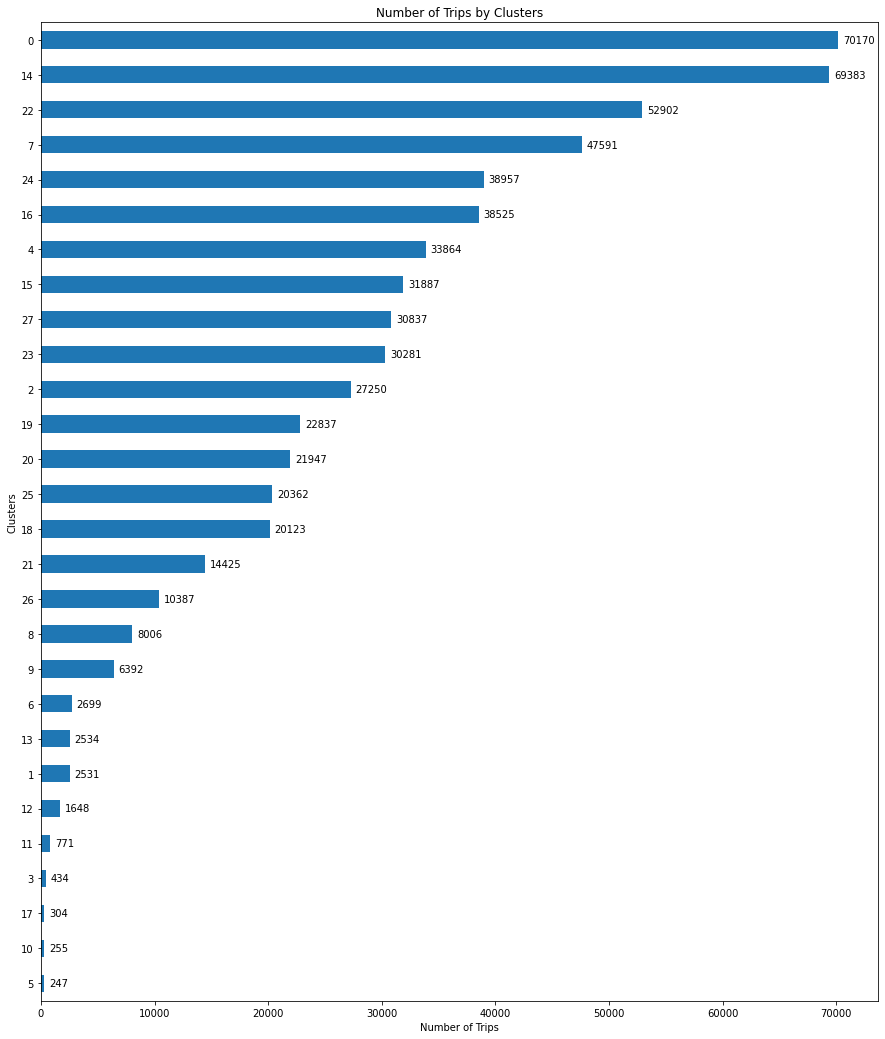

In [114]:
#plt.rcParams['figure.figsize'] = [12, 15]
plt.figure(figsize=(15,18))
# Plot the figure.
cluster = list(sorted_clusters.index)
tripcount = sorted_clusters['tripcount']
# Plot the figure.
ax = tripcount.plot(kind='barh')
ax.set_title('Number of Trips by Clusters')
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Clusters')
ax.set_yticklabels(cluster)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:d}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")

In [115]:
print(len(gdf_ie_start.index))
print(len(gdf_ie_end.index))
gdf_ie = gdf.loc[gdf['GeospatialType'] == 'IE']
print(len(gdf_ie.index))

607549
607549
607549


In [116]:
gdf_ie['StartCluster'] = gdf_ie_start['start_cluster']
gdf_ie['EndCluster'] = gdf_ie_end['end_cluster']

In [117]:
gdf_ie.to_csv('./Full Data1/trips_ie.csv')

# EI: Separate Data with Only "EI" Type

## EI: Starting Point

In [118]:
gdf_ei = gdf.loc[gdf['GeospatialType'] == 'EI']

In [119]:
gdf_ei

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,EndTimezone,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time
10,27cc9abf3646cbe5e90dc99fbc930815,0af4bfe8fae2b6884b320d081d183a15,42998cf32d552343bc8e460416382dca,1,2021-04-05T18:47:30.000Z,1,2021-04-05T19:11:45.000Z,1,38.73105,-104.69902,...,America/Denver,NaN,23101211002130202,23101210113112201,2021-04-05 11:47:30-07:00,2021-04-05 12:11:45-07:00,2021-04-05,11:47:30,2021-04-05,12:11:45
14,cdf41c006b349e95a29d5a1b25ddcbee,0dd8a5017a3bbd9e6fbc40952d2b4ada,42998cf32d552343bc8e460416382dca,1,2021-04-03T15:08:16.000Z,6,2021-04-03T15:16:32.000Z,6,38.77282,-104.81300,...,America/Denver,NaN,23101210111213321,23101210113100323,2021-04-03 08:08:16-07:00,2021-04-03 08:16:32-07:00,2021-04-03,08:08:16,2021-04-03,08:16:32
15,ee4cd0bc8c36920194ec68f376063875,0ec14c96079ca0e5b6afd3d0a429cf49,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:29:31.000Z,2,2021-04-06T18:43:08.000Z,2,38.79316,-104.74708,...,America/Denver,NaN,23101211000023123,23101210113112310,2021-04-06 11:29:31-07:00,2021-04-06 11:43:08-07:00,2021-04-06,11:29:31,2021-04-06,11:43:08
21,d8d1175190eb35763194db413f114e1f,157daa2d55300584f9733dbe9accdb8d,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T23:07:51.000Z,5,2021-04-02T23:43:40.000Z,5,38.87339,-104.69215,...,America/Denver,NaN,23101033222130101,23101210113033212,2021-04-02 16:07:51-07:00,2021-04-02 16:43:40-07:00,2021-04-02,16:07:51,2021-04-02,16:43:40
23,8b15746fc115f81127960cde8f399850,160554fb952625dcbe28079a73ad457a,42998cf32d552343bc8e460416382dca,1,2021-04-03T20:02:40.000Z,6,2021-04-03T20:35:21.000Z,6,38.84666,-104.75532,...,America/Denver,NaN,23101033222202113,23101210113131212,2021-04-03 13:02:40-07:00,2021-04-03 13:35:21-07:00,2021-04-03,13:02:40,2021-04-03,13:35:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316025,484782f7f9b732b335dfe6035d6b3ac0,ee125fdaadab5eaf72c2f7d9e38582fd,d07e70efcfab08731a97e7b91be644de,1,2021-09-13T14:24:10.000Z,1,2021-09-13T14:43:27.000Z,1,38.73319,-104.71824,...,America/Denver,NaN,23101211002120032,23101210113132311,2021-09-13 07:24:10-07:00,2021-09-13 07:43:27-07:00,2021-09-13,07:24:10,2021-09-13,07:43:27
2316032,1b4c0d2917e8fa9f379ca1cbe283b343,f4187f096223ca06ce4ee5243972c886,42998cf32d552343bc8e460416382dca,1,2021-09-13T11:56:42.000Z,1,2021-09-13T12:13:13.000Z,1,38.75676,-104.83222,...,America/Denver,NaN,23101210111223313,23101210113131010,2021-09-13 04:56:42-07:00,2021-09-13 05:13:13-07:00,2021-09-13,04:56:42,2021-09-13,05:13:13
2316041,5a5b4f36e4d7d90d25c3ba5a075a2a44,fb1344ecad811a7219cbd4e71b9cb7bc,42998cf32d552343bc8e460416382dca,1,2021-09-15T16:29:18.000Z,3,2021-09-15T16:54:51.000Z,3,38.88729,-104.71687,...,America/Denver,NaN,23101033222100033,23101210113132310,2021-09-15 09:29:18-07:00,2021-09-15 09:54:51-07:00,2021-09-15,09:29:18,2021-09-15,09:54:51
2316042,2aa662e737c1ed9b4eb1f1531484f11b,fbd4423699de50f3b6bc4d131f389f41,42998cf32d552343bc8e460416382dca,1,2021-09-09T22:04:29.000Z,4,2021-09-09T22:41:40.000Z,4,38.98236,-105.04371,...,America/Denver,NaN,23101032302312121,23101210113100001,2021-09-09 15:04:29-07:00,2021-09-09 15:41:40-07:00,2021-09-09,15:04:29,2021-09-09,15:41:40


In [120]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=28,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = gdf_ei[['StartLocLat', 'StartLocLon']]
end_features = gdf_ei[['EndLocLat', 'EndLocLon']]

In [121]:
# do clustering
kmeans.fit(features)
# save results
labels = kmeans.labels_

In [122]:
# send back into dataframe and display it
gdf_ei['start_cluster'] = labels

In [123]:
gdf_ei

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,start_cluster
10,27cc9abf3646cbe5e90dc99fbc930815,0af4bfe8fae2b6884b320d081d183a15,42998cf32d552343bc8e460416382dca,1,2021-04-05T18:47:30.000Z,1,2021-04-05T19:11:45.000Z,1,38.73105,-104.69902,...,NaN,23101211002130202,23101210113112201,2021-04-05 11:47:30-07:00,2021-04-05 12:11:45-07:00,2021-04-05,11:47:30,2021-04-05,12:11:45,5
14,cdf41c006b349e95a29d5a1b25ddcbee,0dd8a5017a3bbd9e6fbc40952d2b4ada,42998cf32d552343bc8e460416382dca,1,2021-04-03T15:08:16.000Z,6,2021-04-03T15:16:32.000Z,6,38.77282,-104.81300,...,NaN,23101210111213321,23101210113100323,2021-04-03 08:08:16-07:00,2021-04-03 08:16:32-07:00,2021-04-03,08:08:16,2021-04-03,08:16:32,0
15,ee4cd0bc8c36920194ec68f376063875,0ec14c96079ca0e5b6afd3d0a429cf49,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:29:31.000Z,2,2021-04-06T18:43:08.000Z,2,38.79316,-104.74708,...,NaN,23101211000023123,23101210113112310,2021-04-06 11:29:31-07:00,2021-04-06 11:43:08-07:00,2021-04-06,11:29:31,2021-04-06,11:43:08,6
21,d8d1175190eb35763194db413f114e1f,157daa2d55300584f9733dbe9accdb8d,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T23:07:51.000Z,5,2021-04-02T23:43:40.000Z,5,38.87339,-104.69215,...,NaN,23101033222130101,23101210113033212,2021-04-02 16:07:51-07:00,2021-04-02 16:43:40-07:00,2021-04-02,16:07:51,2021-04-02,16:43:40,7
23,8b15746fc115f81127960cde8f399850,160554fb952625dcbe28079a73ad457a,42998cf32d552343bc8e460416382dca,1,2021-04-03T20:02:40.000Z,6,2021-04-03T20:35:21.000Z,6,38.84666,-104.75532,...,NaN,23101033222202113,23101210113131212,2021-04-03 13:02:40-07:00,2021-04-03 13:35:21-07:00,2021-04-03,13:02:40,2021-04-03,13:35:21,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316025,484782f7f9b732b335dfe6035d6b3ac0,ee125fdaadab5eaf72c2f7d9e38582fd,d07e70efcfab08731a97e7b91be644de,1,2021-09-13T14:24:10.000Z,1,2021-09-13T14:43:27.000Z,1,38.73319,-104.71824,...,NaN,23101211002120032,23101210113132311,2021-09-13 07:24:10-07:00,2021-09-13 07:43:27-07:00,2021-09-13,07:24:10,2021-09-13,07:43:27,5
2316032,1b4c0d2917e8fa9f379ca1cbe283b343,f4187f096223ca06ce4ee5243972c886,42998cf32d552343bc8e460416382dca,1,2021-09-13T11:56:42.000Z,1,2021-09-13T12:13:13.000Z,1,38.75676,-104.83222,...,NaN,23101210111223313,23101210113131010,2021-09-13 04:56:42-07:00,2021-09-13 05:13:13-07:00,2021-09-13,04:56:42,2021-09-13,05:13:13,0
2316041,5a5b4f36e4d7d90d25c3ba5a075a2a44,fb1344ecad811a7219cbd4e71b9cb7bc,42998cf32d552343bc8e460416382dca,1,2021-09-15T16:29:18.000Z,3,2021-09-15T16:54:51.000Z,3,38.88729,-104.71687,...,NaN,23101033222100033,23101210113132310,2021-09-15 09:29:18-07:00,2021-09-15 09:54:51-07:00,2021-09-15,09:29:18,2021-09-15,09:54:51,7
2316042,2aa662e737c1ed9b4eb1f1531484f11b,fbd4423699de50f3b6bc4d131f389f41,42998cf32d552343bc8e460416382dca,1,2021-09-09T22:04:29.000Z,4,2021-09-09T22:41:40.000Z,4,38.98236,-105.04371,...,NaN,23101032302312121,23101210113100001,2021-09-09 15:04:29-07:00,2021-09-09 15:41:40-07:00,2021-09-09,15:04:29,2021-09-09,15:41:40,9


In [55]:
gdf_ei.to_csv("./Full Data1/ei_start.csv")

## EI: Starting Point: Show the Number of Trips by Cluster

In [125]:
gdf_ei_start =  pd.read_csv('./Full Data1/ei_start.csv', index_col = 0)

In [126]:
gdf_ei_start

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,start_cluster
10,27cc9abf3646cbe5e90dc99fbc930815,0af4bfe8fae2b6884b320d081d183a15,42998cf32d552343bc8e460416382dca,1,2021-04-05T18:47:30.000Z,1,2021-04-05T19:11:45.000Z,1,38.73105,-104.69902,...,NaN,23101211002130202,23101210113112201,2021-04-05 11:47:30-07:00,2021-04-05 12:11:45-07:00,2021-04-05,11:47:30,2021-04-05,12:11:45,5
14,cdf41c006b349e95a29d5a1b25ddcbee,0dd8a5017a3bbd9e6fbc40952d2b4ada,42998cf32d552343bc8e460416382dca,1,2021-04-03T15:08:16.000Z,6,2021-04-03T15:16:32.000Z,6,38.77282,-104.81300,...,NaN,23101210111213321,23101210113100323,2021-04-03 08:08:16-07:00,2021-04-03 08:16:32-07:00,2021-04-03,08:08:16,2021-04-03,08:16:32,0
15,ee4cd0bc8c36920194ec68f376063875,0ec14c96079ca0e5b6afd3d0a429cf49,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:29:31.000Z,2,2021-04-06T18:43:08.000Z,2,38.79316,-104.74708,...,NaN,23101211000023123,23101210113112310,2021-04-06 11:29:31-07:00,2021-04-06 11:43:08-07:00,2021-04-06,11:29:31,2021-04-06,11:43:08,6
21,d8d1175190eb35763194db413f114e1f,157daa2d55300584f9733dbe9accdb8d,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T23:07:51.000Z,5,2021-04-02T23:43:40.000Z,5,38.87339,-104.69215,...,NaN,23101033222130101,23101210113033212,2021-04-02 16:07:51-07:00,2021-04-02 16:43:40-07:00,2021-04-02,16:07:51,2021-04-02,16:43:40,7
23,8b15746fc115f81127960cde8f399850,160554fb952625dcbe28079a73ad457a,42998cf32d552343bc8e460416382dca,1,2021-04-03T20:02:40.000Z,6,2021-04-03T20:35:21.000Z,6,38.84666,-104.75532,...,NaN,23101033222202113,23101210113131212,2021-04-03 13:02:40-07:00,2021-04-03 13:35:21-07:00,2021-04-03,13:02:40,2021-04-03,13:35:21,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316025,484782f7f9b732b335dfe6035d6b3ac0,ee125fdaadab5eaf72c2f7d9e38582fd,d07e70efcfab08731a97e7b91be644de,1,2021-09-13T14:24:10.000Z,1,2021-09-13T14:43:27.000Z,1,38.73319,-104.71824,...,NaN,23101211002120032,23101210113132311,2021-09-13 07:24:10-07:00,2021-09-13 07:43:27-07:00,2021-09-13,07:24:10,2021-09-13,07:43:27,5
2316032,1b4c0d2917e8fa9f379ca1cbe283b343,f4187f096223ca06ce4ee5243972c886,42998cf32d552343bc8e460416382dca,1,2021-09-13T11:56:42.000Z,1,2021-09-13T12:13:13.000Z,1,38.75676,-104.83222,...,NaN,23101210111223313,23101210113131010,2021-09-13 04:56:42-07:00,2021-09-13 05:13:13-07:00,2021-09-13,04:56:42,2021-09-13,05:13:13,0
2316041,5a5b4f36e4d7d90d25c3ba5a075a2a44,fb1344ecad811a7219cbd4e71b9cb7bc,42998cf32d552343bc8e460416382dca,1,2021-09-15T16:29:18.000Z,3,2021-09-15T16:54:51.000Z,3,38.88729,-104.71687,...,NaN,23101033222100033,23101210113132310,2021-09-15 09:29:18-07:00,2021-09-15 09:54:51-07:00,2021-09-15,09:29:18,2021-09-15,09:54:51,7
2316042,2aa662e737c1ed9b4eb1f1531484f11b,fbd4423699de50f3b6bc4d131f389f41,42998cf32d552343bc8e460416382dca,1,2021-09-09T22:04:29.000Z,4,2021-09-09T22:41:40.000Z,4,38.98236,-105.04371,...,NaN,23101032302312121,23101210113100001,2021-09-09 15:04:29-07:00,2021-09-09 15:41:40-07:00,2021-09-09,15:04:29,2021-09-09,15:41:40,9


In [127]:
# display the number of trips in each cluster
_clusters = gdf_ei_start.groupby('start_cluster',as_index=False).agg(tripcount = ('TripId','count'))
sorted_clusters = _clusters.sort_values(by ='tripcount')

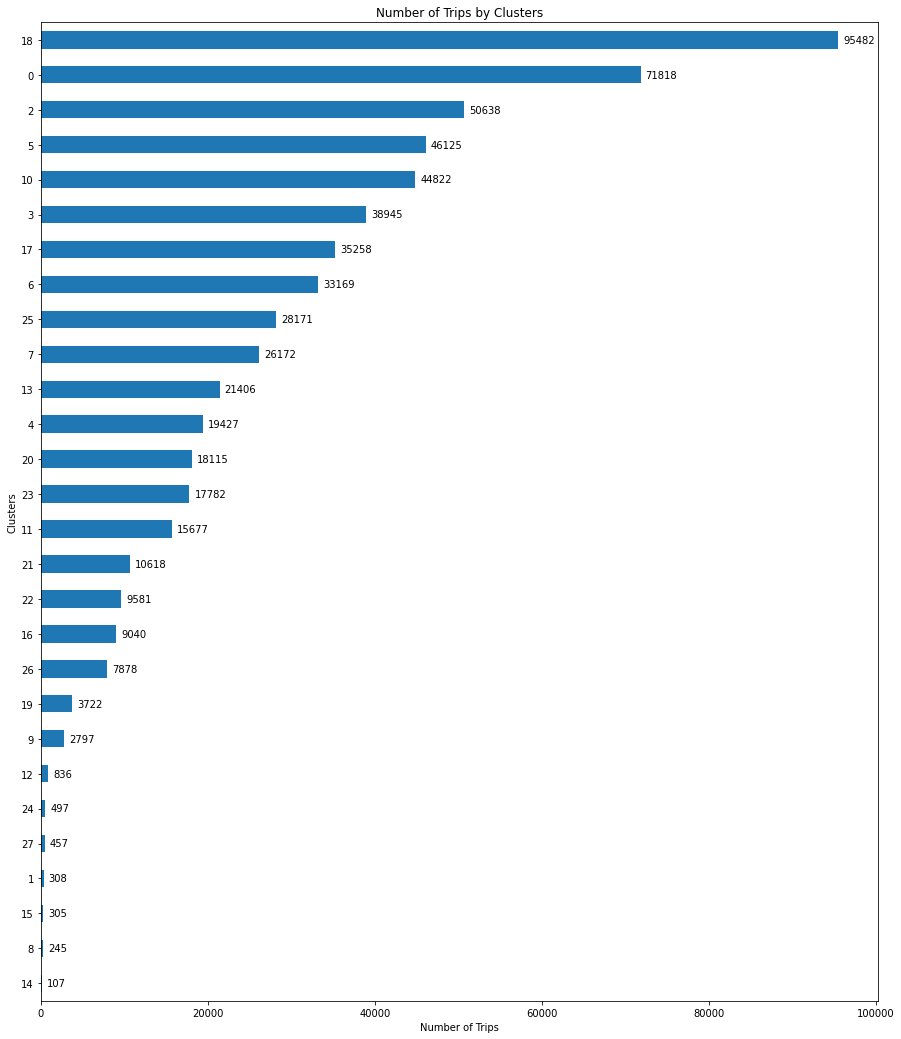

In [128]:
#plt.rcParams['figure.figsize'] = [12, 15]
plt.figure(figsize=(15,18))
# Plot the figure.
cluster = list(sorted_clusters.index)
tripcount = sorted_clusters['tripcount']
# Plot the figure.
ax = tripcount.plot(kind='barh')
ax.set_title('Number of Trips by Clusters')
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Clusters')
ax.set_yticklabels(cluster)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:d}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")

## EI: End Point

In [130]:
gdf_ei = gdf.loc[gdf['GeospatialType'] == 'EI']

In [131]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=28,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = gdf_ei[['StartLocLat', 'StartLocLon']]
end_features = gdf_ei[['EndLocLat', 'EndLocLon']]

In [132]:
# do clustering
kmeans.fit(end_features)
# save results
labels = kmeans.labels_

In [133]:
# send back into dataframe and display it
gdf_ei['end_cluster'] = labels

In [134]:
gdf_ei

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,end_cluster
10,27cc9abf3646cbe5e90dc99fbc930815,0af4bfe8fae2b6884b320d081d183a15,42998cf32d552343bc8e460416382dca,1,2021-04-05T18:47:30.000Z,1,2021-04-05T19:11:45.000Z,1,38.73105,-104.69902,...,NaN,23101211002130202,23101210113112201,2021-04-05 11:47:30-07:00,2021-04-05 12:11:45-07:00,2021-04-05,11:47:30,2021-04-05,12:11:45,18
14,cdf41c006b349e95a29d5a1b25ddcbee,0dd8a5017a3bbd9e6fbc40952d2b4ada,42998cf32d552343bc8e460416382dca,1,2021-04-03T15:08:16.000Z,6,2021-04-03T15:16:32.000Z,6,38.77282,-104.81300,...,NaN,23101210111213321,23101210113100323,2021-04-03 08:08:16-07:00,2021-04-03 08:16:32-07:00,2021-04-03,08:08:16,2021-04-03,08:16:32,16
15,ee4cd0bc8c36920194ec68f376063875,0ec14c96079ca0e5b6afd3d0a429cf49,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:29:31.000Z,2,2021-04-06T18:43:08.000Z,2,38.79316,-104.74708,...,NaN,23101211000023123,23101210113112310,2021-04-06 11:29:31-07:00,2021-04-06 11:43:08-07:00,2021-04-06,11:29:31,2021-04-06,11:43:08,14
21,d8d1175190eb35763194db413f114e1f,157daa2d55300584f9733dbe9accdb8d,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T23:07:51.000Z,5,2021-04-02T23:43:40.000Z,5,38.87339,-104.69215,...,NaN,23101033222130101,23101210113033212,2021-04-02 16:07:51-07:00,2021-04-02 16:43:40-07:00,2021-04-02,16:07:51,2021-04-02,16:43:40,15
23,8b15746fc115f81127960cde8f399850,160554fb952625dcbe28079a73ad457a,42998cf32d552343bc8e460416382dca,1,2021-04-03T20:02:40.000Z,6,2021-04-03T20:35:21.000Z,6,38.84666,-104.75532,...,NaN,23101033222202113,23101210113131212,2021-04-03 13:02:40-07:00,2021-04-03 13:35:21-07:00,2021-04-03,13:02:40,2021-04-03,13:35:21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316025,484782f7f9b732b335dfe6035d6b3ac0,ee125fdaadab5eaf72c2f7d9e38582fd,d07e70efcfab08731a97e7b91be644de,1,2021-09-13T14:24:10.000Z,1,2021-09-13T14:43:27.000Z,1,38.73319,-104.71824,...,NaN,23101211002120032,23101210113132311,2021-09-13 07:24:10-07:00,2021-09-13 07:43:27-07:00,2021-09-13,07:24:10,2021-09-13,07:43:27,21
2316032,1b4c0d2917e8fa9f379ca1cbe283b343,f4187f096223ca06ce4ee5243972c886,42998cf32d552343bc8e460416382dca,1,2021-09-13T11:56:42.000Z,1,2021-09-13T12:13:13.000Z,1,38.75676,-104.83222,...,NaN,23101210111223313,23101210113131010,2021-09-13 04:56:42-07:00,2021-09-13 05:13:13-07:00,2021-09-13,04:56:42,2021-09-13,05:13:13,14
2316041,5a5b4f36e4d7d90d25c3ba5a075a2a44,fb1344ecad811a7219cbd4e71b9cb7bc,42998cf32d552343bc8e460416382dca,1,2021-09-15T16:29:18.000Z,3,2021-09-15T16:54:51.000Z,3,38.88729,-104.71687,...,NaN,23101033222100033,23101210113132310,2021-09-15 09:29:18-07:00,2021-09-15 09:54:51-07:00,2021-09-15,09:29:18,2021-09-15,09:54:51,21
2316042,2aa662e737c1ed9b4eb1f1531484f11b,fbd4423699de50f3b6bc4d131f389f41,42998cf32d552343bc8e460416382dca,1,2021-09-09T22:04:29.000Z,4,2021-09-09T22:41:40.000Z,4,38.98236,-105.04371,...,NaN,23101032302312121,23101210113100001,2021-09-09 15:04:29-07:00,2021-09-09 15:41:40-07:00,2021-09-09,15:04:29,2021-09-09,15:41:40,9


In [65]:
gdf_ei.to_csv("./Full Data1/ei_end.csv")

## EI: End Point: Show the Number of Trips by Clusters

In [135]:
gdf_ei_end = pd.read_csv("./Full Data1/ei_end.csv",index_col=0)

In [136]:
gdf_ei_end

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,WaypointFreqSec,StartQk,EndQk,MST_start_datetime,MST_end_datetime,MST_start_date,MST_start_time,MST_end_date,MST_end_time,end_cluster
10,27cc9abf3646cbe5e90dc99fbc930815,0af4bfe8fae2b6884b320d081d183a15,42998cf32d552343bc8e460416382dca,1,2021-04-05T18:47:30.000Z,1,2021-04-05T19:11:45.000Z,1,38.73105,-104.69902,...,NaN,23101211002130202,23101210113112201,2021-04-05 11:47:30-07:00,2021-04-05 12:11:45-07:00,2021-04-05,11:47:30,2021-04-05,12:11:45,18
14,cdf41c006b349e95a29d5a1b25ddcbee,0dd8a5017a3bbd9e6fbc40952d2b4ada,42998cf32d552343bc8e460416382dca,1,2021-04-03T15:08:16.000Z,6,2021-04-03T15:16:32.000Z,6,38.77282,-104.81300,...,NaN,23101210111213321,23101210113100323,2021-04-03 08:08:16-07:00,2021-04-03 08:16:32-07:00,2021-04-03,08:08:16,2021-04-03,08:16:32,16
15,ee4cd0bc8c36920194ec68f376063875,0ec14c96079ca0e5b6afd3d0a429cf49,42998cf32d552343bc8e460416382dca,1,2021-04-06T18:29:31.000Z,2,2021-04-06T18:43:08.000Z,2,38.79316,-104.74708,...,NaN,23101211000023123,23101210113112310,2021-04-06 11:29:31-07:00,2021-04-06 11:43:08-07:00,2021-04-06,11:29:31,2021-04-06,11:43:08,14
21,d8d1175190eb35763194db413f114e1f,157daa2d55300584f9733dbe9accdb8d,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T23:07:51.000Z,5,2021-04-02T23:43:40.000Z,5,38.87339,-104.69215,...,NaN,23101033222130101,23101210113033212,2021-04-02 16:07:51-07:00,2021-04-02 16:43:40-07:00,2021-04-02,16:07:51,2021-04-02,16:43:40,15
23,8b15746fc115f81127960cde8f399850,160554fb952625dcbe28079a73ad457a,42998cf32d552343bc8e460416382dca,1,2021-04-03T20:02:40.000Z,6,2021-04-03T20:35:21.000Z,6,38.84666,-104.75532,...,NaN,23101033222202113,23101210113131212,2021-04-03 13:02:40-07:00,2021-04-03 13:35:21-07:00,2021-04-03,13:02:40,2021-04-03,13:35:21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316025,484782f7f9b732b335dfe6035d6b3ac0,ee125fdaadab5eaf72c2f7d9e38582fd,d07e70efcfab08731a97e7b91be644de,1,2021-09-13T14:24:10.000Z,1,2021-09-13T14:43:27.000Z,1,38.73319,-104.71824,...,NaN,23101211002120032,23101210113132311,2021-09-13 07:24:10-07:00,2021-09-13 07:43:27-07:00,2021-09-13,07:24:10,2021-09-13,07:43:27,21
2316032,1b4c0d2917e8fa9f379ca1cbe283b343,f4187f096223ca06ce4ee5243972c886,42998cf32d552343bc8e460416382dca,1,2021-09-13T11:56:42.000Z,1,2021-09-13T12:13:13.000Z,1,38.75676,-104.83222,...,NaN,23101210111223313,23101210113131010,2021-09-13 04:56:42-07:00,2021-09-13 05:13:13-07:00,2021-09-13,04:56:42,2021-09-13,05:13:13,14
2316041,5a5b4f36e4d7d90d25c3ba5a075a2a44,fb1344ecad811a7219cbd4e71b9cb7bc,42998cf32d552343bc8e460416382dca,1,2021-09-15T16:29:18.000Z,3,2021-09-15T16:54:51.000Z,3,38.88729,-104.71687,...,NaN,23101033222100033,23101210113132310,2021-09-15 09:29:18-07:00,2021-09-15 09:54:51-07:00,2021-09-15,09:29:18,2021-09-15,09:54:51,21
2316042,2aa662e737c1ed9b4eb1f1531484f11b,fbd4423699de50f3b6bc4d131f389f41,42998cf32d552343bc8e460416382dca,1,2021-09-09T22:04:29.000Z,4,2021-09-09T22:41:40.000Z,4,38.98236,-105.04371,...,NaN,23101032302312121,23101210113100001,2021-09-09 15:04:29-07:00,2021-09-09 15:41:40-07:00,2021-09-09,15:04:29,2021-09-09,15:41:40,9


In [137]:
# display the number of mamber each clustering
_clusters = gdf_ei_end.groupby('end_cluster',as_index=False).agg(tripcount = ('TripId','count'))
sorted_clusters = _clusters.sort_values(by ='tripcount')

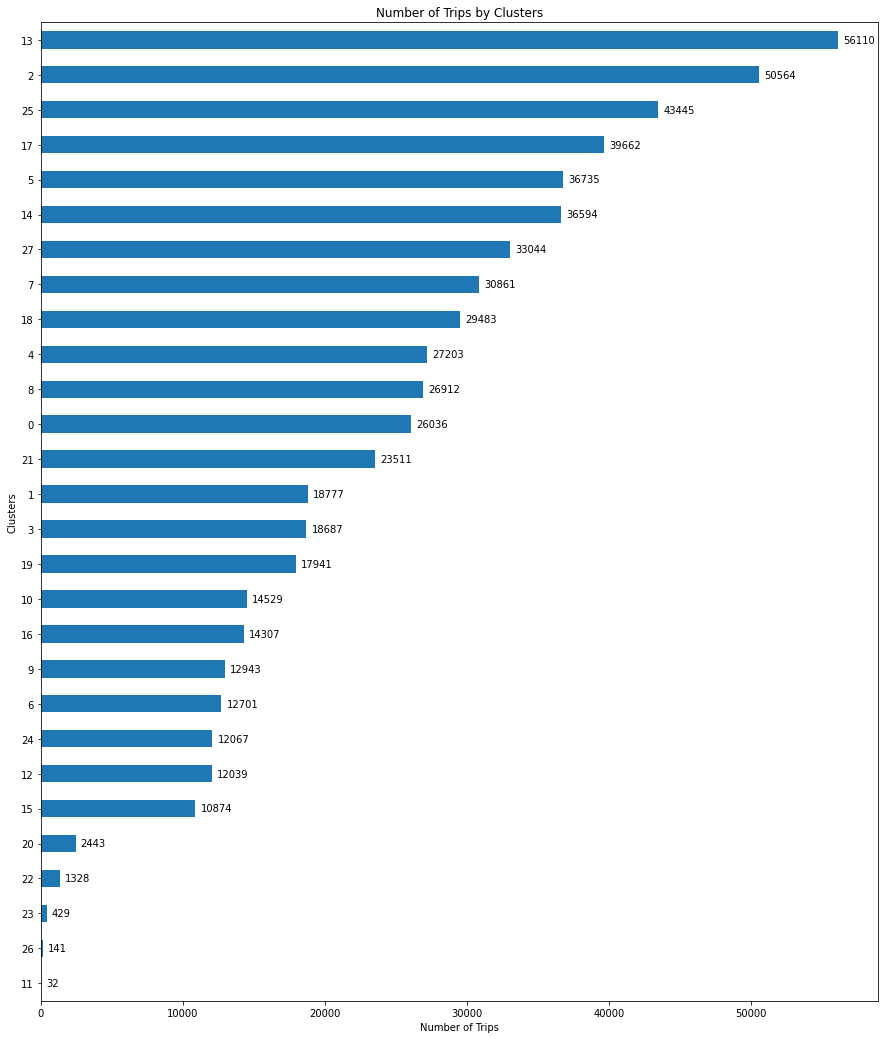

In [138]:
#plt.rcParams['figure.figsize'] = [12, 15]
plt.figure(figsize=(15,18))
# Plot the figure.
cluster = list(sorted_clusters.index)
tripcount = sorted_clusters['tripcount']
# Plot the figure.
ax = tripcount.plot(kind='barh')
ax.set_title('Number of Trips by Clusters')
ax.set_xlabel('Number of Trips')
ax.set_ylabel('Clusters')
ax.set_yticklabels(cluster)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:d}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#plt.savefig("image.png")

In [139]:
print(len(gdf_ei_start.index))
print(len(gdf_ei_end.index))
gdf_ei = gdf.loc[gdf['GeospatialType'] == 'EI']
print(len(gdf_ei.index))

609398
609398
609398


In [140]:
gdf_ei['StartCluster'] = gdf_ei_start['start_cluster']
gdf_ei['EndCluster'] = gdf_ei_end['end_cluster']

In [141]:
gdf_ei.to_csv('./Full Data1/trips_ei.csv')